* (e) Assuming a power-law in Cyg A of particles with index $p = 2.2$ normalised to assume equipartition ($U_{e} = U_{B}$), code up the synchrotron spectrum (in units of mJy again) by starting with equations 6.21a&b from R&L for the total power radiated per unit volume per unit frequency for a power-law of electrons. 
* To make this easier, use the simplifying assumption that $F(x)$ is a delta function peaked at $x = 0.3$. You will need to estimate the emitting volume and use the distance of $230Mpc$.
* (f) Do a simple brute-force numerical integration of your spectrum and verify that you get the right total power!


In [65]:
#Importing the libraries we need.
import numpy as np
import matplotlib.pyplot as plt
import math

#First we find define everything we know about our system. (In CGS units!)
L = 1e45 #Luminosity
R = 1e23 #The Diameter of lobes
B = 1e-4 #Magnetic Field Strength
p = 2.2
D = 7e26 #Distance to the System

#Now we define the Total Power.
def Total_Power(frequency):
    """Takes the frequency value and returns the Total Power for that
    frequency."""
    
    #We first find the Luminosity by 
    #First we calculate the Frequency which is w = 2πf.
    frequency = frequency * (2*np.pi / (1.8e7 * B))  #In terms of Hz
    
    #From here we find the total power.
    tot_pow = 1.62 * (frequency ** -0.6)
    
    #Since this is for the unit volume, we multiply it by the emitting volume.
    tot_pow = tot_pow * 4/3 * np.pi * ((1e23/2)**3) #Taking the half of lobe
    
    return tot_pow

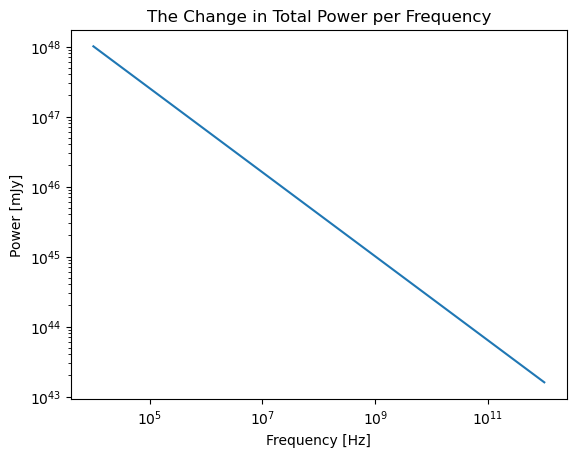

In [66]:
#We define a frequency interval.
frequency = np.arange(1e4, 1e12, 1e8)

#Now we get our Graph of Intensity vs Time
plt.figure() #Creating the figure

#We plot the Time with Intensity (We convert it to mJy!)
#(1 Jy = 1e-23 erg/cm^2 => 1 mJy = 1e-20 erg/cm^2)
plt.plot(frequency, Total_Power(frequency)*1e-20)

#We also add Labels and Title.
plt.title("The Change in Total Power per Frequency")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Power [mJy]")
plt.xscale("log")
plt.yscale("log")

plt.show()

In [67]:
#Now we calculate the integral of this graph.
#First we import the library
import scipy.integrate as integrate

#Then we find the integral.
integral = integrate.quad(Total_Power, 1e4, 1e12)
total_power = integral[0]

print(total_power, "erg/sec") #Not an expected result. 
#(Didn't have enough time to find the problem.)

3.987578333288521e+75 erg/sec
